# Graph Distances
## Bellman Ford

Given a weighted graph, determine the single source shortest path. This means you determine the shortest distance from the starting vertex to any other vertices on the graph.    

Let $n$ be the number of vertices and $m$ be the number of edges of the graph    

1. Create an array D[n]. Initialize the source value to zero and all remaining values to infinity. Each element of the array corresponds to the distance of that element from the source vertex. The distance from the source to itself is 0, and all others are unknown.
2. Iterate over this array $n-1$ times, each time performing the following actions.
3. Iterate over each edge of the graph. For each (source, destination) of the edge
```
        D[destination] = min(D[source] + weight(source, destination), D[destination])
```
4. If during one of the iterations, no changes are made to D, then you may terminate early.
5. If you run the algorithm 1 final time after $n-1$ iterations and a distance changes, then the graph has a negative cycle.

In [109]:
import numpy as np
import pandas as pd
import math
from math import inf
import networkx as nx
import matplotlib.pyplot as plt
import math

def style_specific_cell(df, row, col, c):
    df_styler = pd.DataFrame('', index = df.index, columns = df.columns)
    df_styler.iloc[row, col] = 'color: black;background-color: ' + c
    return df_styler


def print_paths(G, pos, options, path1):
    alpha = "-abcdefghijklmnopqrstuvwxyz"
    nx.draw_networkx_labels(G, pos, {x: alpha[x] for x in G.nodes}, font_size=18, font_color="black")
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes, node_color="white", **options)
    nx.draw_networkx_edges(G, pos, edgelist=path1, width=3, alpha=0.6, edge_color="red", arrowsize=25)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=3, alpha=0.5, edge_color="grey", arrowsize=25)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    ax = plt.gca()
    ax.margins(0.20)
    plt.show()

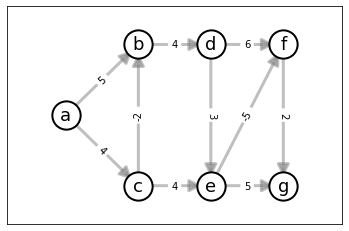

Edge order: [('a', 'b'), ('a', 'c'), ('b', 'd'), ('c', 'b'), ('c', 'e'), ('d', 'e'), ('d', 'f'), ('e', 'f'), ('e', 'g'), ('f', 'g')]

In [123]:
######################### DEFINE POINTS  #########################
# points have to be defined by (x, y) coordinates because of the way Networkx library displays graphs
points = [(0, 2), (2, 4), (2, 0), (4, 4), (4, 0), (6, 4), (6, 0)] # nodes are labeled with alphabet based on order here

# key = alphabet char of point, values = list of tuples (connected node char, weight)
adj_list = {'a': [('b', 5), ('c', 4)],
            'b': [('d', 4)],
            'c': [('b', -2), ('e', 4)],
            'd': [('e', 3), ('f', 6)],
            'e': [('f', -5), ('g', 5)],
            'f': [('g', 2)] }
##########################################################################

alpha = "-abcdefghijklmnopqrstuvwxyz"
edge_list = [(c1, val[0]) for c1, vals in adj_list.items() for val in vals]
pos = {i+1: point for i, point in enumerate(points)}
options = {
    "node_size": 800,
    "edgecolors": "black",
    "linewidths": 2,
    "alpha": 1
    }
G = nx.DiGraph()
G.add_nodes_from(pos.keys())
G.add_edges_from([(alpha.index(c1), alpha.index(val[0]), {'weight': val[1]}) for c1, vals in adj_list.items() for val in vals ])

print_paths(G, pos, options, [])
print(f"Edge order: {edge_list}", end='')

,a,b,c,d,e,f,g
0,0,inf,inf,inf,inf,inf,inf


--------------
ITERATION: 1
--------------
--------------
RELAX: a, b


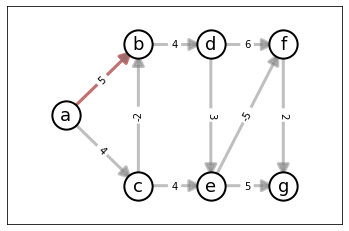

,a,b,c,d,e,f,g
1,0,5,inf,inf,inf,inf,inf


--------------
RELAX: a, c


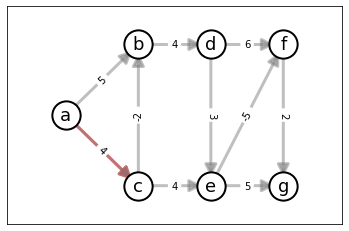

,a,b,c,d,e,f,g
1,0,5,4,inf,inf,inf,inf


--------------
RELAX: b, d


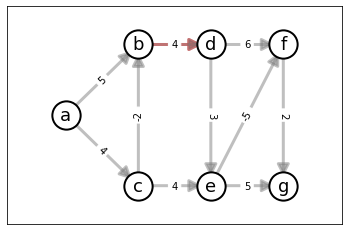

,a,b,c,d,e,f,g
1,0,5,4,9,inf,inf,inf


--------------
RELAX: c, b


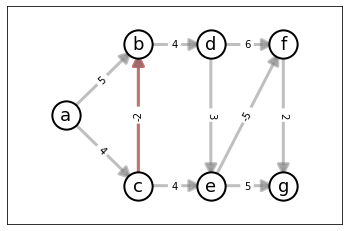

,a,b,c,d,e,f,g
1,0,2,4,9,inf,inf,inf


--------------
RELAX: c, e


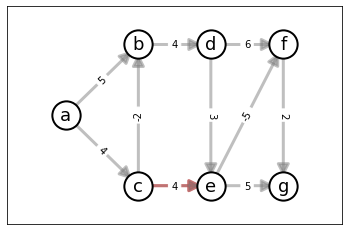

,a,b,c,d,e,f,g
1,0,2,4,9,8,inf,inf


--------------
RELAX: d, e


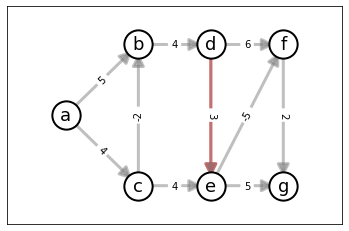

,a,b,c,d,e,f,g
1,0,2,4,9,8,inf,inf


--------------
RELAX: d, f


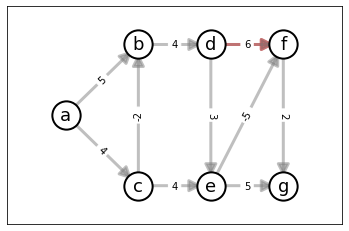

,a,b,c,d,e,f,g
1,0,2,4,9,8,15,inf


--------------
RELAX: e, f


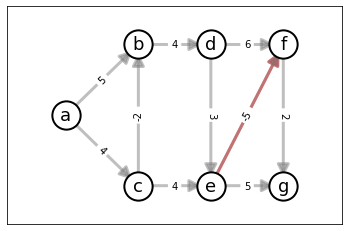

,a,b,c,d,e,f,g
1,0,2,4,9,8,3,inf


--------------
RELAX: e, g


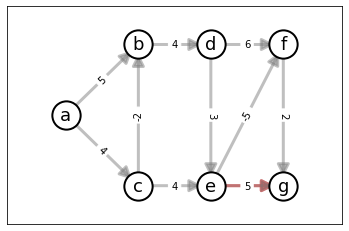

,a,b,c,d,e,f,g
1,0,2,4,9,8,3,13


--------------
RELAX: f, g


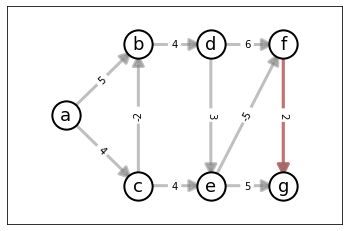

,a,b,c,d,e,f,g
1,0,2,4,9,8,3,5


--------------
ITERATION: 2
--------------
--------------
RELAX: a, b


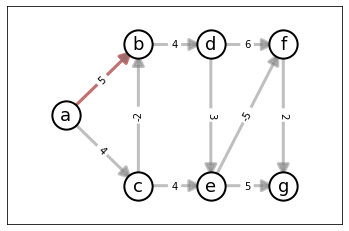

,a,b,c,d,e,f,g
2,0,2,4,9,8,3,5


--------------
RELAX: a, c


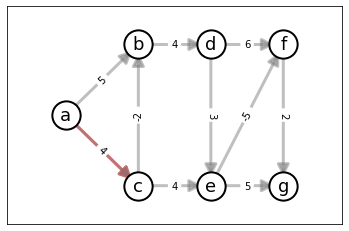

,a,b,c,d,e,f,g
2,0,2,4,9,8,3,5


--------------
RELAX: b, d


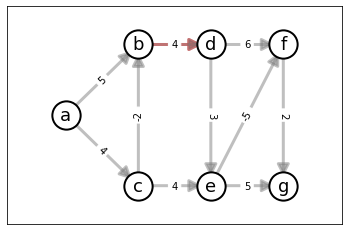

,a,b,c,d,e,f,g
2,0,2,4,6,8,3,5


--------------
RELAX: c, b


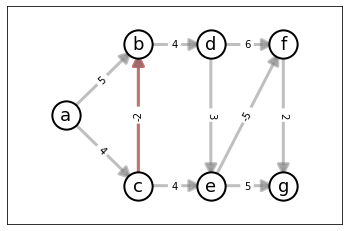

,a,b,c,d,e,f,g
2,0,2,4,6,8,3,5


--------------
RELAX: c, e


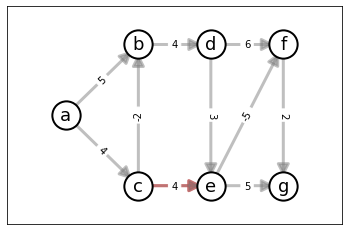

,a,b,c,d,e,f,g
2,0,2,4,6,8,3,5


--------------
RELAX: d, e


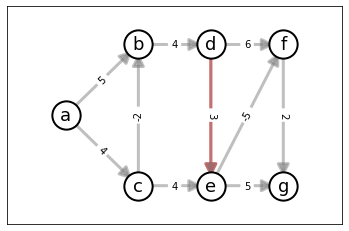

,a,b,c,d,e,f,g
2,0,2,4,6,8,3,5


--------------
RELAX: d, f


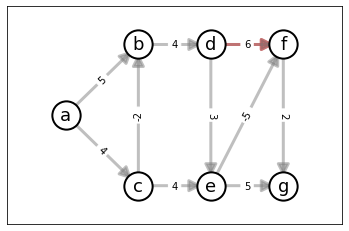

,a,b,c,d,e,f,g
2,0,2,4,6,8,3,5


--------------
RELAX: e, f


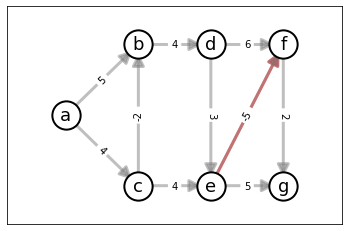

,a,b,c,d,e,f,g
2,0,2,4,6,8,3,5


--------------
RELAX: e, g


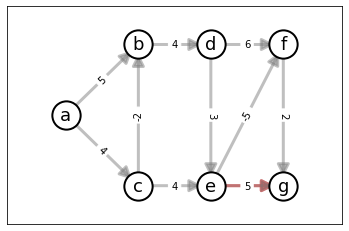

,a,b,c,d,e,f,g
2,0,2,4,6,8,3,5


--------------
RELAX: f, g


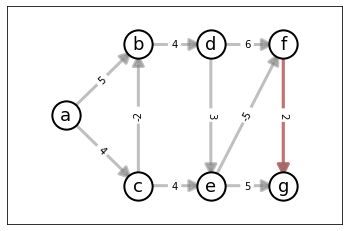

,a,b,c,d,e,f,g
2,0,2,4,6,8,3,5


--------------
ITERATION: 3
--------------
--------------
RELAX: a, b


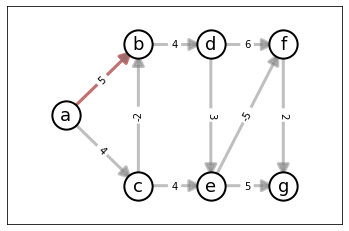

,a,b,c,d,e,f,g
3,0,2,4,6,8,3,5


--------------
RELAX: a, c


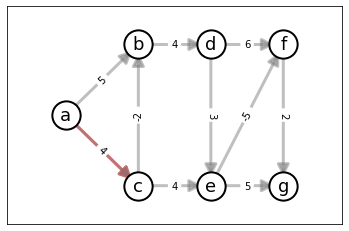

,a,b,c,d,e,f,g
3,0,2,4,6,8,3,5


--------------
RELAX: b, d


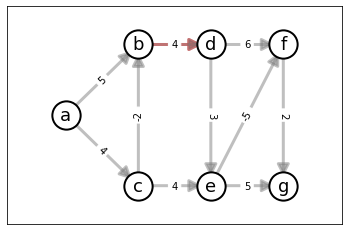

,a,b,c,d,e,f,g
3,0,2,4,6,8,3,5


--------------
RELAX: c, b


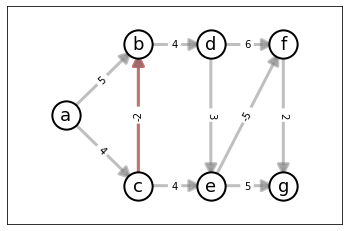

,a,b,c,d,e,f,g
3,0,2,4,6,8,3,5


--------------
RELAX: c, e


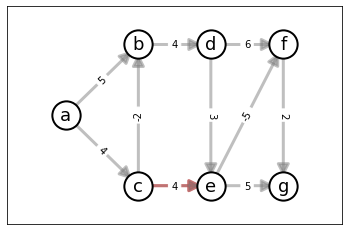

,a,b,c,d,e,f,g
3,0,2,4,6,8,3,5


--------------
RELAX: d, e


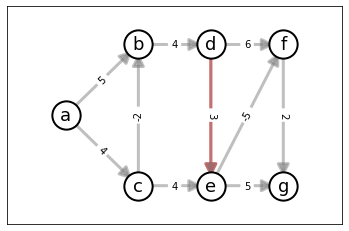

,a,b,c,d,e,f,g
3,0,2,4,6,8,3,5


--------------
RELAX: d, f


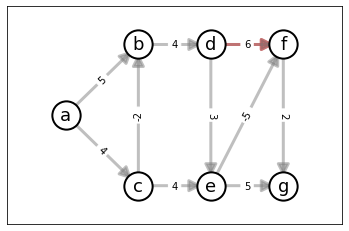

,a,b,c,d,e,f,g
3,0,2,4,6,8,3,5


--------------
RELAX: e, f


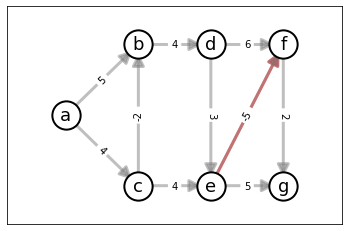

,a,b,c,d,e,f,g
3,0,2,4,6,8,3,5


--------------
RELAX: e, g


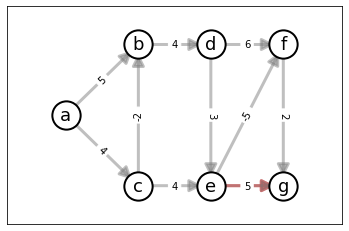

,a,b,c,d,e,f,g
3,0,2,4,6,8,3,5


--------------
RELAX: f, g


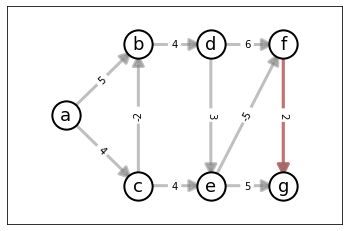

,a,b,c,d,e,f,g
3,0,2,4,6,8,3,5


FINAL SOLUTION:


,a,b,c,d,e,f,g
3,0,2,4,6,8,3,5


In [125]:
df = pd.DataFrame(index=[0],columns=[alpha[i] for i in range(1, len(points)+1)], data=math.inf)
df.iloc[0,0] = 0
display(df.style.format(precision = 0))

changed = False
for v in range(1, len(G.nodes)):
    df = df.rename(index = lambda x: x + 1)
    print(f"--------------")
    print(f"ITERATION: {v}")
    print(f"--------------")
    for i, j, w in G.edges(data=True):
        source = df.loc[v, alpha[i]]
        dest = df.loc[v, alpha[j]]
        print(f"--------------")
        print(f"RELAX: {alpha[i]}, {alpha[j]}")
        print_paths(G, pos, options, [(i, j)])
        if dest > source + w['weight']:
            changed = True
            df.loc[v, alpha[j]] = source + w['weight']
            display(df.style.apply(style_specific_cell, row = 0, col = j-1, c='gold', axis = None).format(precision = 0))
        else:
            display(df.style.format(precision = 0))
    
    if not changed:
        break
    changed = False

print("FINAL SOLUTION:")
display(df.style.format(precision = 0))

## Complexity

Time complexity: $O(nm)$ where $n$ is the number of vertices and $m$ is the number of edges

